**Predicting if a person would buy life insurnace based on his age using logistic regression**

**Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).**

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("insurance_data.csv")
df.head()

age  affordibility  bought_insurance
0   22              1                 0
1   25              0                 0
2   47              1                 1
3   52              0                 0
4   46              1                 1

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X = df.drop(['bought_insurance'], axis = 'columns')
Y = df['bought_insurance']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 25)

**Preprocessing: Scale the data so that both age and affordibility are in same scaling range**

In [6]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

In [7]:
X_train_scaled.head()

age  affordibility
0   0.22              1
13  0.29              0
6   0.55              0
17  0.58              1
24  0.50              1

**Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network**
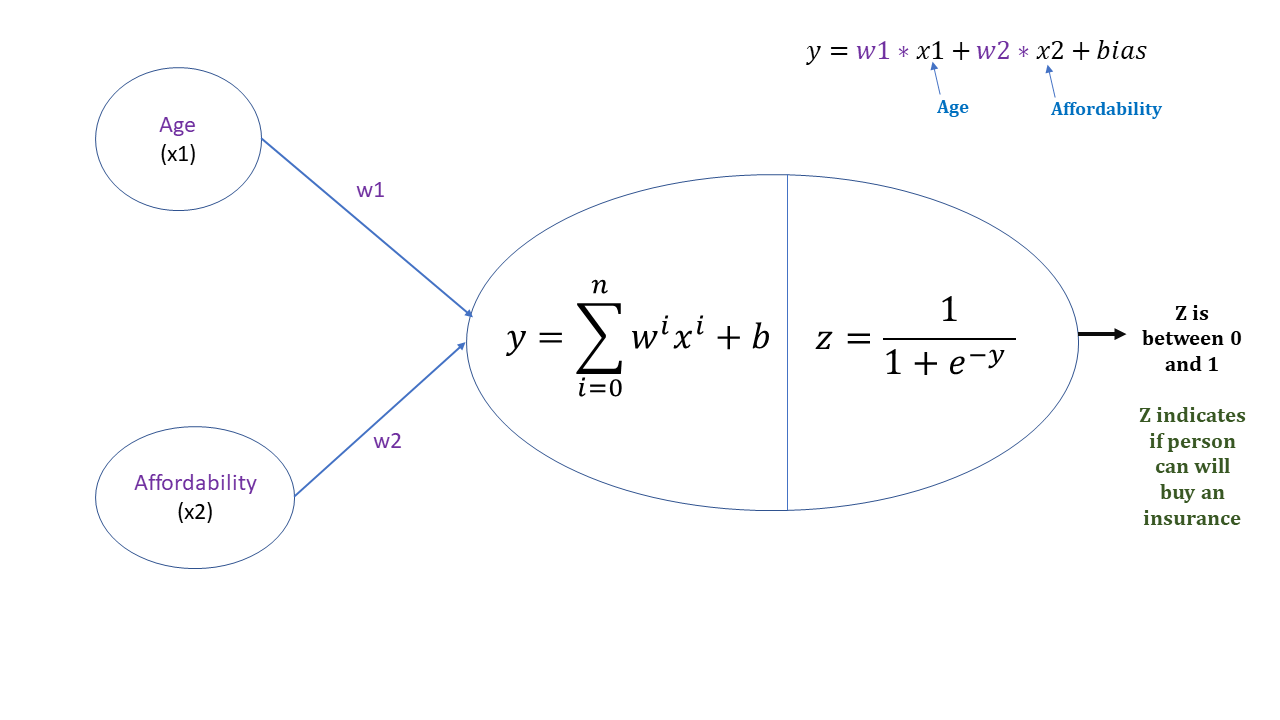

In [8]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape = (2,), activation = 'sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)
model.fit(X_train_scaled, y_train, epochs = 10)

Epoch 1/10


C:\Program Files\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 903ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5000 - loss: 0.7079


In [9]:
model.evaluate(X_test_scaled, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5000 - loss: 0.7282


[0.7282423973083496, 0.5]

In [10]:
X_test_scaled

age  affordibility
2   0.47              1
10  0.18              1
21  0.26              0
11  0.28              1
14  0.49              1
9   0.61              1

In [11]:
model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


array([[0.8092768 ],
       [0.76100826],
       [0.5615384 ],
       [0.7785465 ],
       [0.8123143 ],
       [0.8297589 ]], dtype=float32)

In [12]:
y_test

2     1
10    0
21    0
11    0
14    1
9     1
Name: bought_insurance, dtype: int64

**Now get the value of weights and bias from the model**

In [13]:
coef, intercept = model.get_weights()

In [14]:
coef, intercept

(array([[0.99001  ],
        [0.9900079]], dtype=float32),
 array([-0.00999467], dtype=float32))

**This means w1=5.060867, w2=1.4086502, bias =-2.9137027**

In [15]:
def sigmoid(x):
    import math
    return 1 / (1 + math.exp(x))
sigmoid(18)

1.522997951276035e-08

In [16]:
X_test

age  affordibility
2    47              1
10   18              1
21   26              0
11   28              1
14   49              1
9    61              1

**Instead of model.predict, write our own prediction function that uses w1,w2 and bias**

In [17]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19372\2425661362.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(x))


0.19072317892452256

In [18]:
prediction_function(.18, 1)

C:\Users\Admin\AppData\Local\Temp\ipykernel_19372\2425661362.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 / (1 + math.exp(x))


0.23899177189141782

**Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent**

**First write couple of helper routines such as sigmoid and log_loss**

In [19]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))

array([0.99999386, 0.5       , 0.73105858])

In [21]:
# epsilon is a very small number, here it's 1 x 10^-15.
# It's used to ensure that no logarithm operation is performed on zero or close to zero numbers which would result in undefined behavior or numerical instability.
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    # y_predicted_new is created by iterating through each element in y_predicted and ensuring that they are not too close to 0 or 1. 
    # This is done to avoid numerical instability issues when taking logarithms of values too close to zero or one.
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new) # y_predicted_new is converted to a numpy array for ease of mathematical operations.
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))

**All right now comes the time to implement our final gradient descent function !! yay !!!**

In [ ]:
# This function is an implementation of gradient descent, a popular optimization algorithm used in machine learning to minimize the loss function. 
def gradient_descent(age, affordability, y_true, epochs, loss_thresold):
    w1 = w2 = 1 # w1 and w2 are initialized to 1, representing the weights for age and affordability features respectively.
    bias = 0 # bias is initialized to 0, representing the intercept term.
    rate = 0.5 # rate is the learning rate, set to 0.5. determines the step size at each iteration while moving toward a minimum of a loss function.
    n = len(age)
    for i in range(epochs):
        weighted_sum = w1 * age + w2 * affordability + bias
        y_predicted = sigmoid_numpy(weighted_sum)
        loss = log_loss(y_true, y_predicted)

        # w1d and w2d are calculated using the gradients of the loss function with respect to the weights w1 and w2 respectively. 
        # These gradients tell us how much the loss would change if we make a small change in the weights.
        w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true)) 
        w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true)) 

        bias_d = np.mean(y_predicted-y_true)
        # The weights (w1 and w2) and bias are updated by subtracting a fraction of the gradients multiplied by the learning rate.
        # For each weight (w1 and w2), we subtract a fraction of the gradient (w1d and w2d) multiplied by the learning rate (rate). 
        # This tells us to move the weights in the direction that reduces the loss, but not too quickly (controlled by the learning rate).
        w1 = w1 - rate * w1d
        w2 = w2 - rate * w2d
        bias = bias - rate * bias_d
        # In simple terms, these lines of code are calculating how much we need to adjust the weights and bias of our model to make the predictions more accurate. 

        print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

        if loss<=loss_thresold:  # if you reach the minima then you break from the loop
            break

    return w1, w2, bias

In [23]:
gradient_descent(X_train_scaled['age'],X_train_scaled['affordibility'],y_train,1000, 0.4631)

Epoch:0, w1:0.974907633470177, w2:0.948348125394529, bias:-0.11341867736368583, loss:0.7113403233723417
Epoch:1, w1:0.9556229728273669, w2:0.9058873696677865, bias:-0.2122349122718517, loss:0.681264778737757
Epoch:2, w1:0.9416488476693794, w2:0.8719790823960313, bias:-0.2977578997796538, loss:0.6591474252715025
Epoch:3, w1:0.9323916996249162, w2:0.8457541517722915, bias:-0.3715094724003511, loss:0.6431523291301917
Epoch:4, w1:0.9272267472726993, w2:0.8262362885332687, bias:-0.43506643026891584, loss:0.6316873063379158
Epoch:5, w1:0.9255469396815343, w2:0.8124402814952774, bias:-0.48994490058938817, loss:0.623471707997592
Epoch:6, w1:0.9267936114129968, w2:0.8034375029757677, bias:-0.5375299543522853, loss:0.6175321183044205
Epoch:7, w1:0.93047170420295, w2:0.7983920007454487, bias:-0.5790424270894963, loss:0.6131591858705934
Epoch:8, w1:0.9361540784567942, w2:0.7965748796787705, bias:-0.6155315088627655, loss:0.6098518179750948
Epoch:9, w1:0.9434791243557357, w2:0.7973647616854131, bia

(5.051047623653049, 1.4569794548473887, -2.9596534546250037)

In [24]:
coef, intercept

(array([[0.99001  ],
        [0.9900079]], dtype=float32),
 array([-0.00999467], dtype=float32))

**This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function**